In [39]:
import pandas as pd
import numpy as np
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
csv = pd.read_csv("../csvs/predictions_log_zuericrop_3.csv")

In [41]:
# Remove all the True Label == 0
csv = csv[csv["True Label"] != 0]

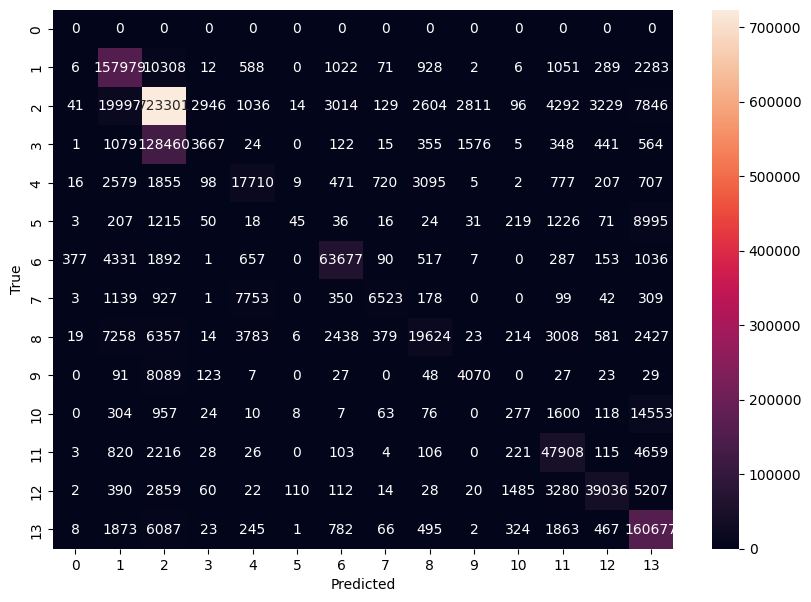

In [42]:


cm = confusion_matrix(csv["True Label"], csv["Predicted Label"])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [43]:
# Can you compute the overall accuracy, mean accuracy and mean intersection over union?

# Overall accuracy
overall_accuracy = cm.diagonal().sum() / cm.sum()
print(f"Overall accuracy: {overall_accuracy}")

# Mean accuracy
mean_accuracy = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
mean_accuracy = mean_accuracy.mean()

print(f"Mean accuracy: {mean_accuracy}")

# Mean intersection over union
intersection = cm.diagonal()
union = cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
iou = intersection / union
miou = iou.mean()

print(f"Mean intersection over union: {miou}")

# F1 score
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)

# Calculate F1-score, handling cases where precision + recall = 0
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)

# Compute mean F1-score
f1 = f1.mean()

print(f"Mean F1-score: {f1}")

Overall accuracy: 0.7918023723009716
Mean accuracy: 0.5026830683527618
Mean intersection over union: 0.40932671380455227
Mean F1-score: 0.5088408943206348


/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/642309265.py:8: RuntimeWarning: invalid value encountered in divide
  mean_accuracy = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/642309265.py:23: RuntimeWarning: invalid value encountered in divide
  recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/642309265.py:27: RuntimeWarning: invalid value encountered in divide
  (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0


In [44]:
# Accuracy per class
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print(f"Accuracy per class: {accuracy_per_class}")

# Intersection over union per class
intersection = cm.diagonal()  # True positives
union = (
    cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
)  # True positives + False positives + False negatives
iou = intersection / union

print(f"Intersection over union per class: {iou}")

# F1 score per class
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)


# Make a csv with the results
results = {
    "Class" : range(0, len(accuracy_per_class)),
    "Overall Accuracy": accuracy_per_class,
    
    "IOU": iou,
    "F1-score": f1
}

results = pd.DataFrame(results)
results.to_csv("results.csv", index=False)

Accuracy per class: [       nan 0.90509038 0.93770062 0.02683361 0.62688046 0.00370188
 0.87198904 0.37652967 0.42539724 0.32471677 0.01539145 0.85231902
 0.74177672 0.92923609]
Intersection over union per class: [0.         0.73611105 0.76736461 0.02618594 0.41749175 0.00365735
 0.78122661 0.3452967  0.35951269 0.23925695 0.01346687 0.64681977
 0.66887134 0.72531238]


/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/1039917325.py:2: RuntimeWarning: invalid value encountered in divide
  accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/1039917325.py:16: RuntimeWarning: invalid value encountered in divide
  recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
/var/folders/y5/hk8_d62d5bgdp420t6dj96h80000gn/T/ipykernel_18372/1039917325.py:18: RuntimeWarning: invalid value encountered in divide
  (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
/Users/franmgl/anaconda3/envs/personal/lib/python3.8/site-packages/pandas/core/internals/blocks.py:2536: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [38]:
results.to_csv("results.csv", index=False)

/Users/franmgl/anaconda3/envs/personal/lib/python3.8/site-packages/pandas/core/internals/blocks.py:2536: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
